In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
data = pd.read_csv('C:/Deloitte Folder/ML//Decision Trees/kyphosis.csv')

In [8]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [9]:
data.duplicated().sum()

0

In [10]:
data['Age'][data['Age'] >85].count()

41

#### Decision tree is not much affected by the outliers. so no need to handle the outliers. handling the outliers is optional

In [11]:
# handling outliers
data['Age']=np.where(data['Age']>87,data['Age'].median(),data['Age'])

In [12]:
x=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tr=DecisionTreeClassifier()
tr.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
y_pred=tr.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_pred,y_test)
acc=accuracy_score(y_pred,y_test)
print(cm)
print(acc*100)

[[9 0]
 [3 5]]
82.35294117647058


In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       1.00      0.75      0.86        12
     present       0.62      1.00      0.77         5

    accuracy                           0.82        17
   macro avg       0.81      0.88      0.81        17
weighted avg       0.89      0.82      0.83        17



In [18]:
%pip install dtreeviz

In [19]:
import graphviz
from sklearn import tree
import matplotlib.pyplot as plt

[Text(953.25, 509.625, '[87.  4.  5.] <= 12.5\ngini = 0.305\nsamples = 64\nvalue = [52, 12]\nclass = absent'),
 Text(511.5, 441.675, '[87.  3. 14.] <= 4.5\ngini = 0.486\nsamples = 24\nvalue = [14, 10]\nclass = absent'),
 Text(186.0, 373.725, '[71.  3.  5.] <= 84.0\ngini = 0.298\nsamples = 11\nvalue = [9, 2]\nclass = absent'),
 Text(93.0, 305.775, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = absent'),
 Text(279.0, 305.775, '[87.  3. 14.] <= 2.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = absent'),
 Text(186.0, 237.825, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = absent'),
 Text(372.0, 237.825, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = absent'),
 Text(837.0, 373.725, '[71.  3.  5.] <= 51.5\ngini = 0.473\nsamples = 13\nvalue = [5, 8]\nclass = absent'),
 Text(651.0, 305.775, '[87.  3. 14.] <= 6.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = absent'),
 Text(558.0, 237.825, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = absent'),
 Text(744.0, 237.825, '[87.

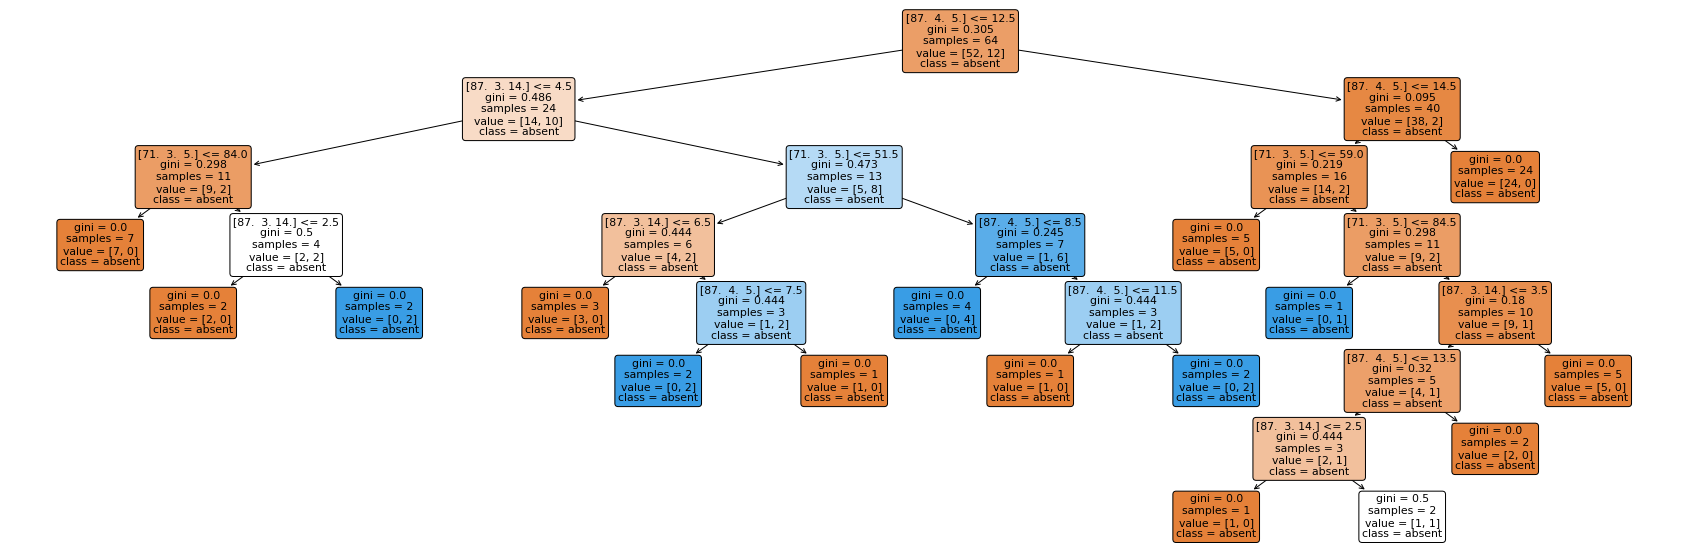

In [23]:
plt.figure(figsize=(30,10))
tree.plot_tree(
    tr,
    feature_names = x,
    class_names=y,
    filled=True,
    rounded=True)